In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "5"

In [2]:
from rich import print
import scanpy as sc
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import torch
torch.set_float32_matmul_precision('high')

/public/home/xyy/miniforge3/envs/scverse/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


In [3]:
import tempfile
import scvi
from scvi.model import SCVI

In [4]:
import omicverse as ov
ov.plot_set()

🔬 Starting plot initialization...
🧬 Detecting GPU devices…
✅ NVIDIA CUDA GPUs detected: 1
    • [CUDA 0] NVIDIA GeForce RTX 4090
      Memory: 23.6 GB | Compute: 8.9

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.8   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
ov.settings.cpu_gpu_mixed_init()

CPU-GPU mixed mode activated
Available GPU accelerators: CUDA


In [7]:
sns.set_theme()
%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

In [8]:
sc.settings.verbosity = 3  
sc.settings.figdir = "/public/home/xyy/LT_tmp/scTE/sEOAD/plots/"
sc.settings.set_figure_params(dpi=120, facecolor="white", dpi_save=900, format="pdf")

In [9]:
print(os.getcwd())
os.chdir("/public/home/xyy/LT_tmp/scTE/sEOAD/")
print(os.getcwd())

/public/home/xyy/LT_tmp/scTE/code/sEOAD

/public/home/xyy/LT_tmp/scTE/sEOAD

In [10]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)
save_dir = tempfile.TemporaryDirectory()
scvi.settings.logging_dir = save_dir.name

Seed set to 0


Last run with scvi-tools version: 1.3.3

In [11]:
adata=sc.read_h5ad("/public/home/xyy/LT_tmp/TE_pre/irescue/h5ad/sEOAD_irescue.h5ad")

In [12]:
adata

AnnData object with n_obs × n_vars = 97903 × 1269391
    obs: 'Barcode1', 'SampleID', 'Barcode2', 'tissue', 'disease_state', 'Sex', 'age_on_death', 'num', 'bc', 'pct_counts_mt', 'SampleID_meta', 'Diagnosis', 'popv_prediction', 'popv_prediction_score', 'cell_type'
    var: 'gene_ids', 'feature_types'

In [13]:
adata.obs.sample(3)

Barcode1 SampleID                Barcode2  \
SampleID_Barcode                                                            
NIH14_TCCGGTAAGGCTGTGC  TCCGGTAAGGCTGTGC    NIH14  NIH14_TCCGGTAAGGCTGTGC   
NIH13_CCAACCAAGCCTGGTA  CCAACCAAGCCTGGTA    NIH13  NIH13_CCAACCAAGCCTGGTA   
NIH03_AACAGATAGCTCATAA  AACAGATAGCTCATAA    NIH03  NIH03_AACAGATAGCTCATAA   

                                   tissue disease_state     Sex  age_on_death  \
SampleID_Barcode                                                                
NIH14_TCCGGTAAGGCTGTGC  Entorhinal cortex         sEOAD  female            64   
NIH13_CCAACCAAGCCTGGTA  Prefrontal cortex         sEOAD  female            64   
NIH03_AACAGATAGCTCATAA        Hippocampus       Control    male            61   

                        num                      bc  pct_counts_mt  \
SampleID_Barcode                                                     
NIH14_TCCGGTAAGGCTGTGC   11  NIH14_TCCGGTAAGGCTGTGC       0.587173   
NIH13_CCAACCAAGCCTGGTA   10  NIH13_CCAACCAAGCCTGGTA      10.513727   
NIH03_AACAGATAGCTCATAA    3  NIH03_AACAGATAGCTCATAA       1.630789   

                       SampleID_meta Diagnosis popv_prediction  \
SampleID_Barcode                                                 
NIH14_TCCGGTAAGGCTGTGC         NIH14        AD             Oli   
NIH13_CCAACCAAGCCTGGTA         NIH13        AD             Inh   
NIH03_AACAGATAGCTCATAA         NIH03   Control      Mic_Immune   

                       popv_prediction_score   cell_type  
SampleID_Barcode                                          
NIH14_TCCGGTAAGGCTGTGC                     7         Oli  
NIH13_CCAACCAAGCCTGGTA                     6         Inh  
NIH03_AACAGATAGCTCATAA                     7  Mic_Immune

In [14]:
adata.var.sample(3)

gene_ids    feature_types
L1ME3G_dup19          L1ME3G_dup19  Gene Expression
Tigger2a_dup1206  Tigger2a_dup1206  Gene Expression
AluJo_dup54077      AluJo_dup54077  Gene Expression

In [15]:
adata.layers['counts']=adata.X.copy()
adata.layers['raw_counts']=adata.X.copy()

In [16]:
adata.obs['cell_type'].value_counts()

cell_type
Oli           37885
Exc           23185
Inh           11524
Ast           10605
Mic_Immune     6490
OPC            5776
Vasc           2438
Name: count, dtype: int64

In [17]:
adata.obs['Diagnosis'].value_counts()

Diagnosis
AD         54721
Control    43182
Name: count, dtype: int64

In [18]:
adata.obs['tissue'].value_counts()

tissue
Prefrontal cortex    39772
Hippocampus          30548
Entorhinal cortex    27583
Name: count, dtype: int64

In [19]:
adata.obs['Sex'].value_counts()

Sex
male      52354
female    45549
Name: count, dtype: int64

In [20]:
adata.obs['SampleID'].value_counts()

SampleID
NIH12     7362
NIH10     7130
NIH15     6939
NIH11     6361
NIH14     6288
NIH16     5881
NIH06     5644
NIH04     5552
UT04      4696
NIH03     4665
UT09      4574
NIH17     4512
NIH18     4298
NIH02     4277
NIH13     3727
NIH29     3237
NIH01     3124
NIH05     2908
NIH28     2865
UT2105    2223
NIH30     1640
Name: count, dtype: int64

In [21]:
# adata.X=adata.layers['raw_counts'].copy()

In [22]:
# ov.pp.preprocess(
#     adata=adata,
#     n_HVGs=1000000,
#     target_sum=50*1e4,
#     mode='shiftlog|pearson',
# )

In [23]:
sc.pp.highly_variable_genes(adata=adata,n_top_genes=1000000,flavor='seurat_v3',layer='raw_counts',subset=True,)

extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [24]:
# ov.pp.scale(adata,layers_add='ov_scaled',)

In [25]:
# adata.raw = adata
# adata = adata[:, adata.var.highly_variable_features]

In [26]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer='raw_counts',
    labels_key='cell_type',
    batch_key="SampleID",
    categorical_covariate_keys=['Sex','tissue',],
    continuous_covariate_keys=["pct_counts_mt"],    
)

In [27]:
scvi_model = scvi.model.SCVI(adata,n_layers=3,n_hidden=256,n_latent=32,gene_likelihood="nb")

In [28]:
import time

start2 = time.time()

scvi_model.train(
    max_epochs=1000,
    check_val_every_n_epoch=5,
    early_stopping=True,
    early_stopping_patience=50,
    early_stopping_monitor='elbo_validation',
    accelerator="gpu",
)

print("done")
end2 = time.time()
print(f"Elapsed time: {end2 - start2:.2f} seconds")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Monitored metric elbo_validation did not improve in the last 50 records. Best score: 22901.598. Signaling Trainer to stop.


done

Elapsed time: 23111.61 seconds

In [ ]:
# plt.plot(scvi_model.history["elbo_validation"])
# plt.xlabel("Epochs")
# plt.ylabel("Validation ELBO")
# plt.title("Validation ELBO Over Training")
# plt.show()

In [30]:
scvi_model

SCVI model with the following parameters: 
n_hidden: 256, n_latent: 32, n_layers: 3, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Trained
Model's adata is minified?: False

In [31]:
assert scvi_model.is_trained

In [32]:
SCVI_LATENT_KEY = "X_scVI_sEOAD_TE"
latent = scvi_model.get_latent_representation()
adata.obsm[SCVI_LATENT_KEY] = latent

In [33]:
latent.shape

(97903, 32)

In [34]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=50,)
sc.tl.umap(adata,)

computing PCA
    with n_comps=50
    finished (0:08:46)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:34)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:01:19)


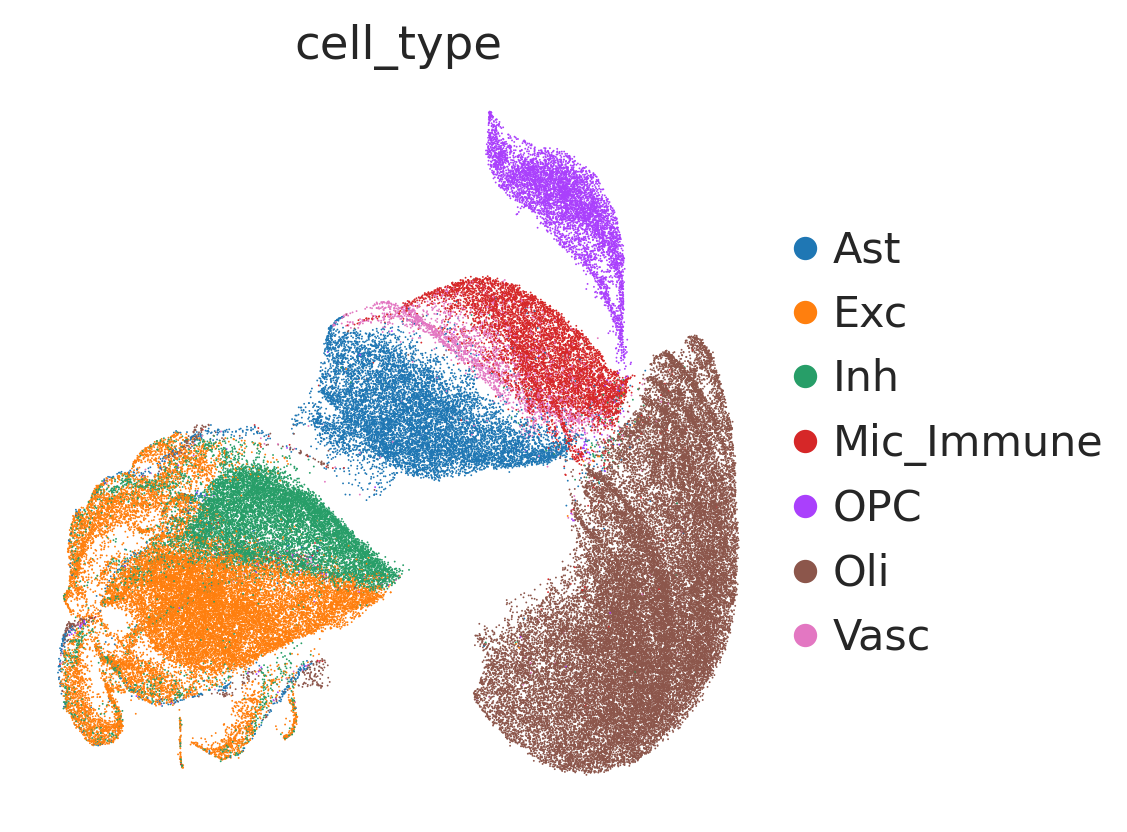

In [35]:
sc.pl.umap(
    adata,
    color=['cell_type'],
    frameon=False,
    save="sEOAD_TE_pca_cell_type1.pdf",
)

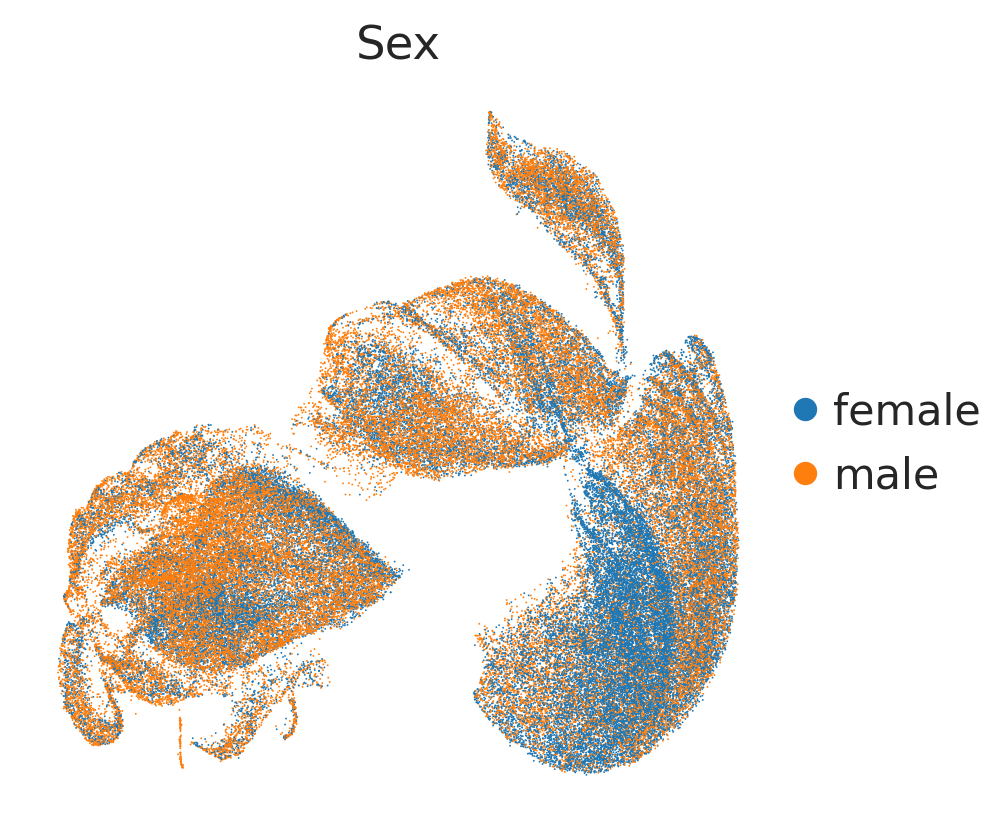

In [36]:
sc.pl.umap(
    adata,
    color=['Sex'],
    frameon=False,
    save="sEOAD_TE_pca_Sex1.pdf",
)

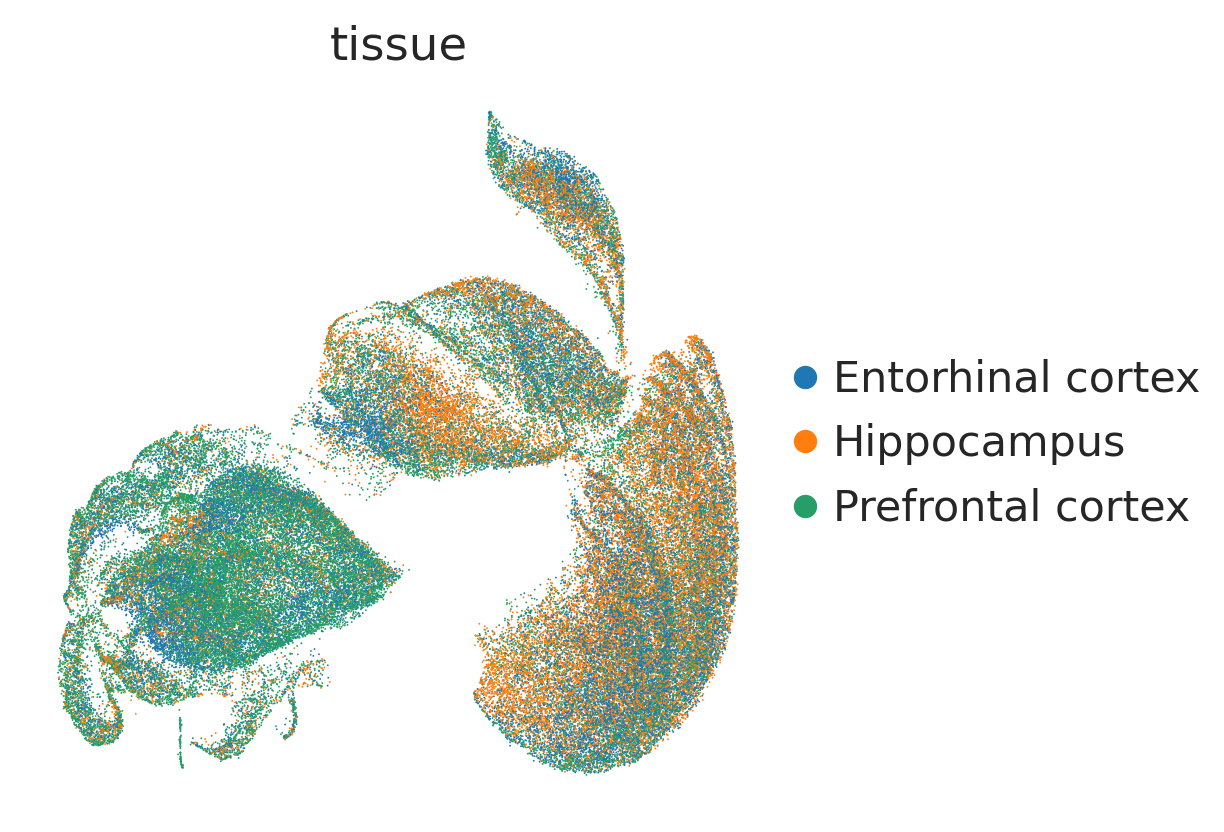

In [37]:
sc.pl.umap(
    adata,
    color=['tissue'],
    frameon=False,
    save="sEOAD_TE_pca_tissue1.pdf",
)

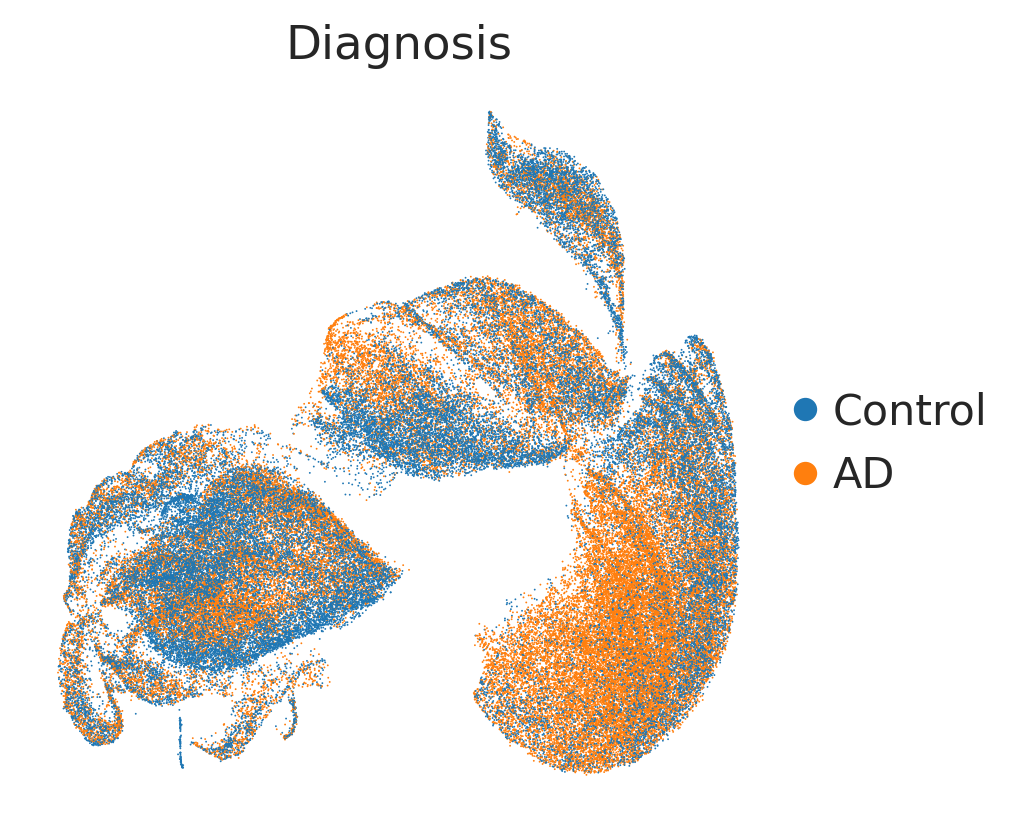

In [38]:
sc.pl.umap(
    adata,
    color=['Diagnosis'],
    frameon=False,
    save="sEOAD_TE_pca_Diagnosis1.pdf",
)

In [39]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY,)
sc.tl.leiden(adata,)
sc.tl.umap(adata,)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
running Leiden clustering
    finished: found 29 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:02:32)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:01:03)


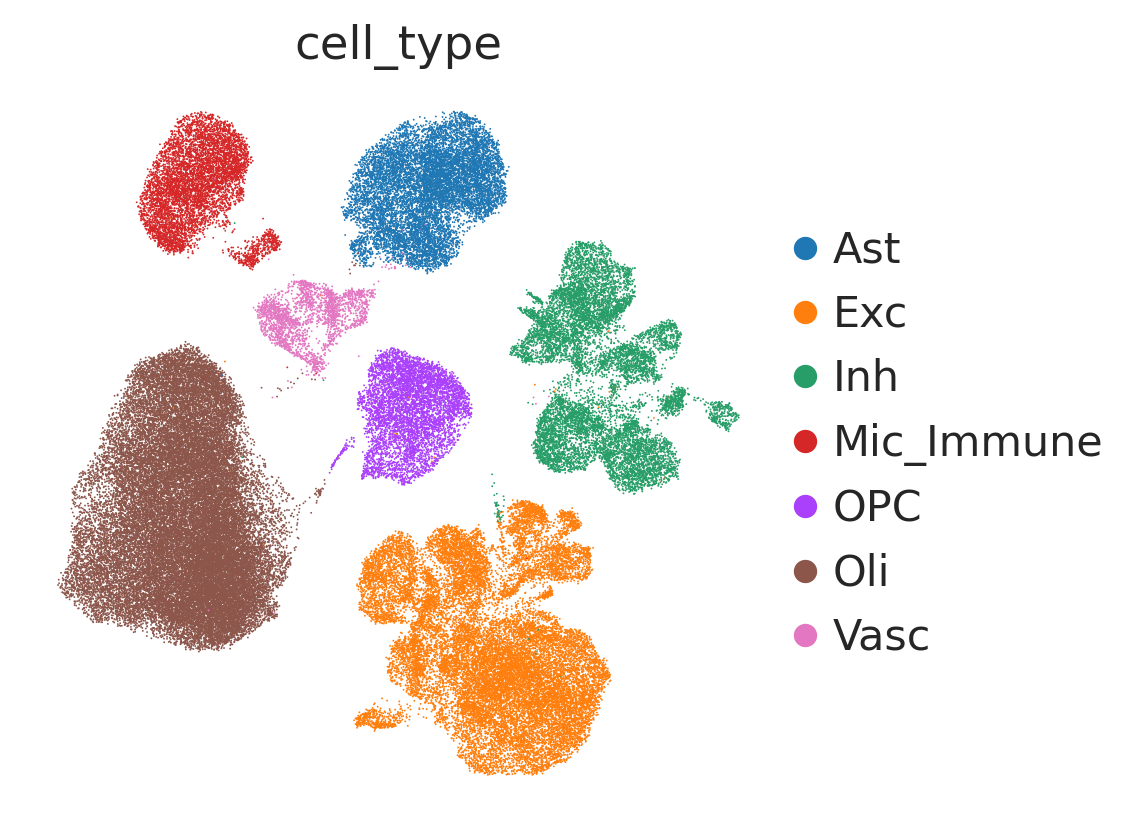

In [40]:
sc.pl.umap(
    adata,
    color=['cell_type'],
    frameon=False,
    save="sEOAD_TE_scvi_cell_type1.pdf",
)

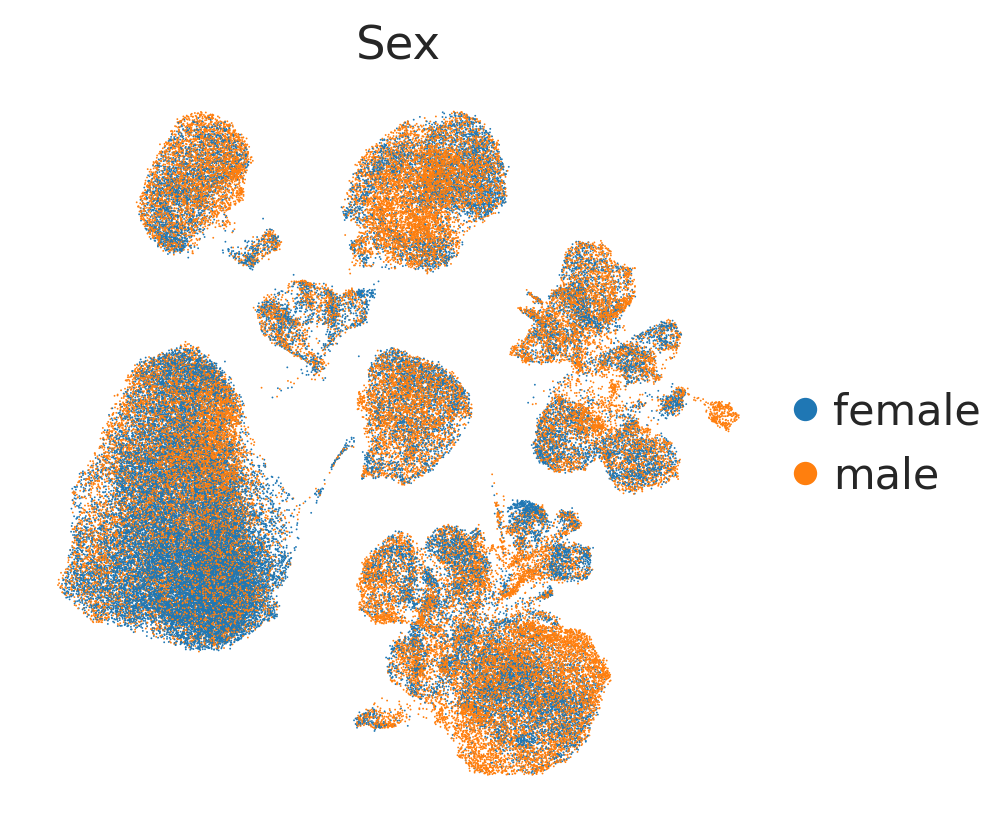

In [41]:
sc.pl.umap(
    adata,
    color=['Sex'],
    frameon=False,
    save="sEOAD_TE_scvi_Sex1.pdf",
)

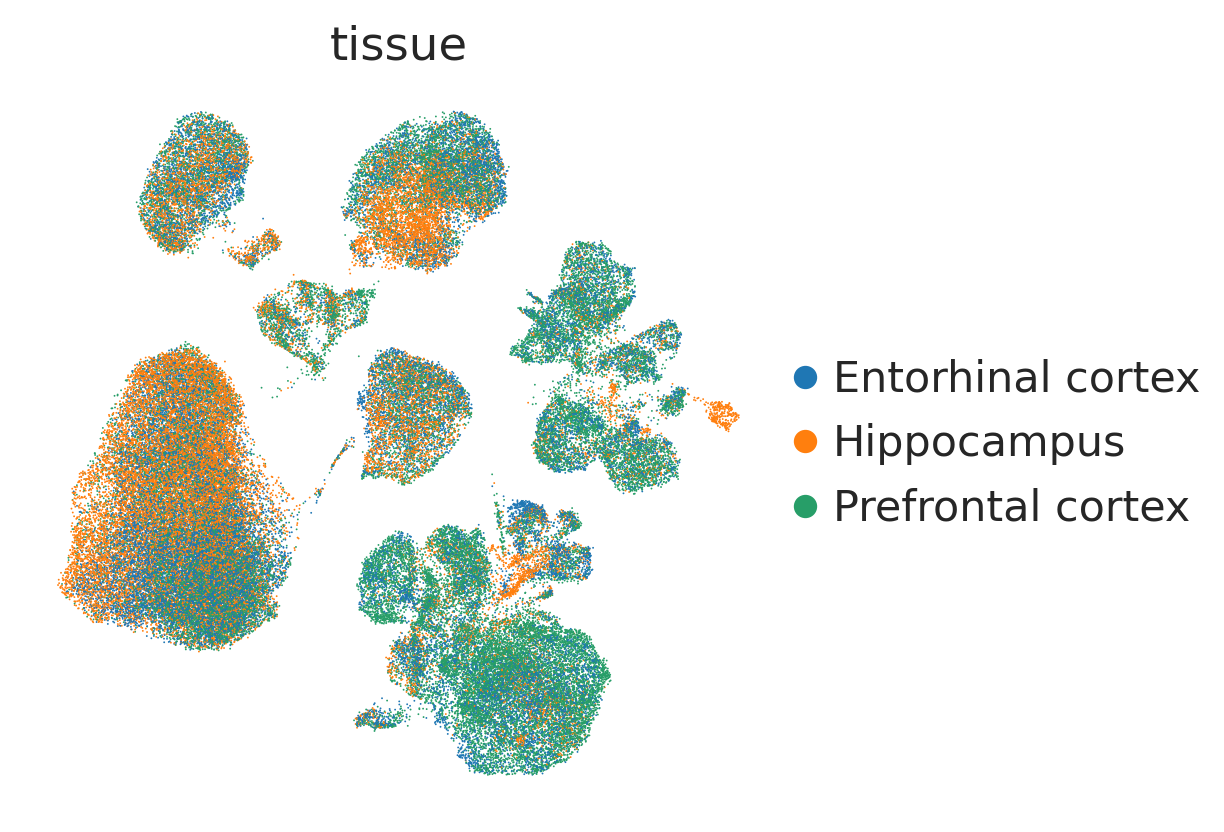

In [42]:
sc.pl.umap(
    adata,
    color=['tissue'],
    frameon=False,
    save="sEOAD_TE_scvi_tissue1.pdf",
)

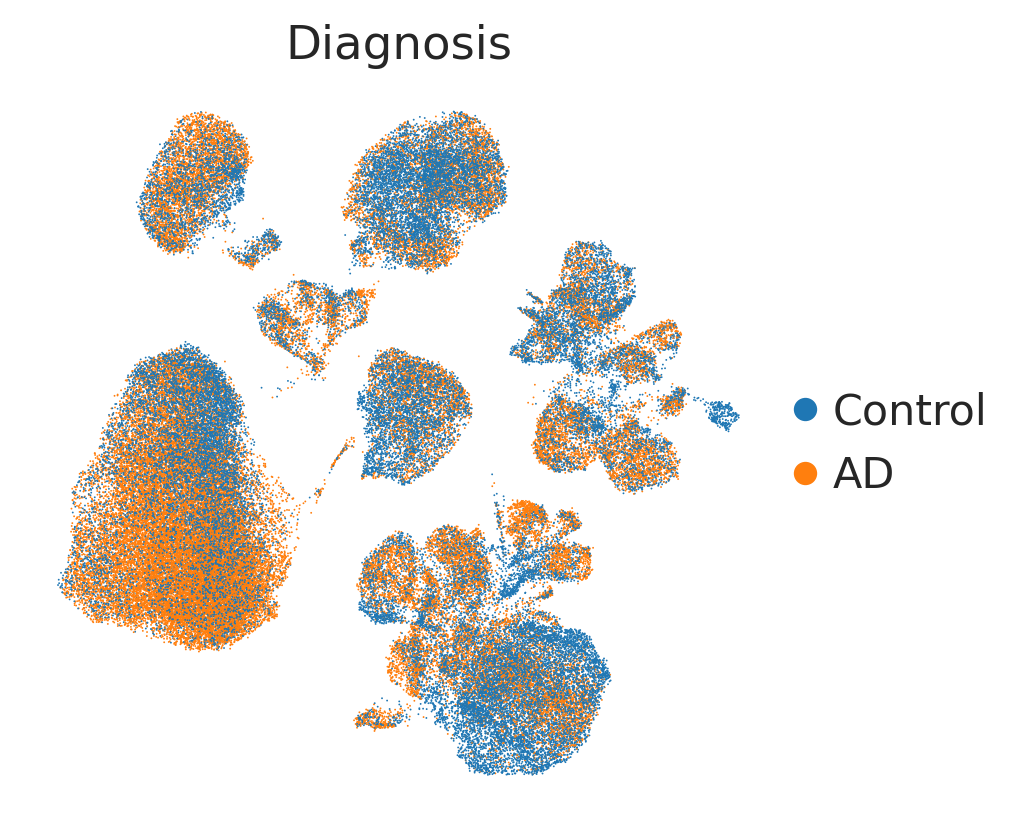

In [43]:
sc.pl.umap(
    adata,
    color=['Diagnosis'],
    frameon=False,
    save="sEOAD_TE_scvi_Diagnosis1.pdf",
)

In [44]:
SCVI_CLUSTERS_KEY = "leiden_scVI"
sc.tl.leiden(adata, key_added=SCVI_CLUSTERS_KEY, resolution=0.8)

running Leiden clustering
    finished: found 24 clusters and added
    'leiden_scVI', the cluster labels (adata.obs, categorical) (0:01:56)


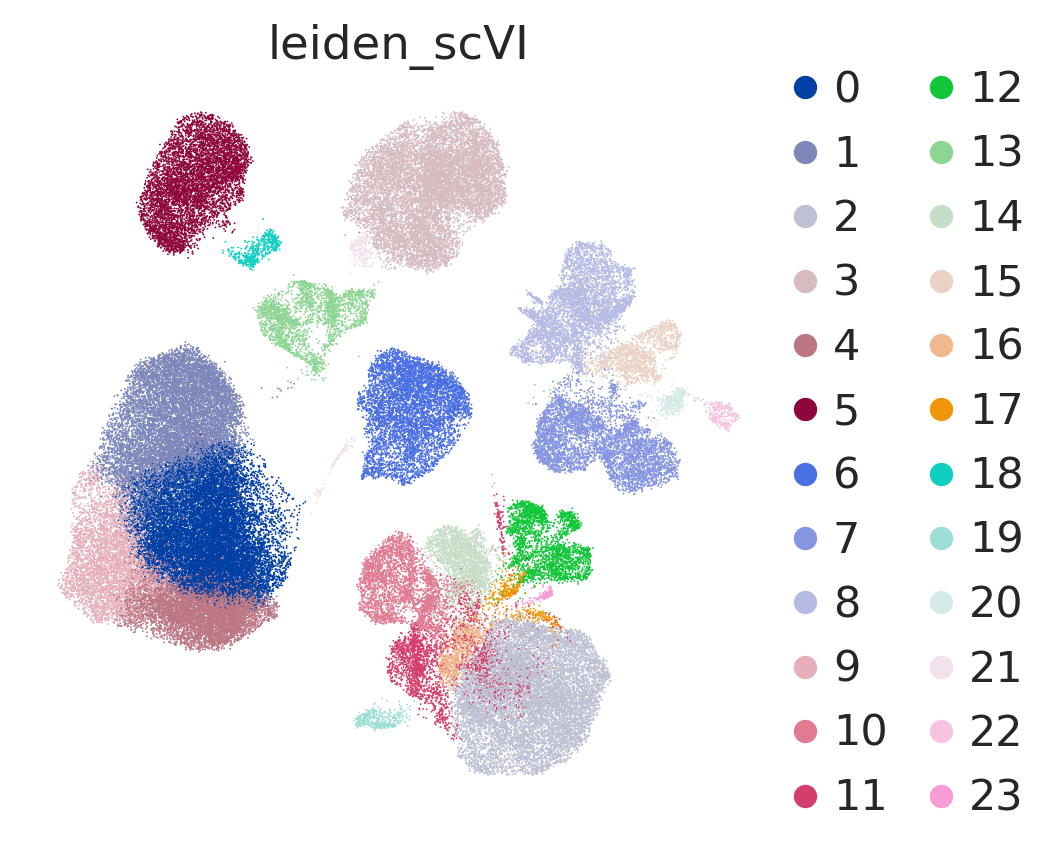

In [45]:
sc.pl.umap(
    adata,
    color=[SCVI_CLUSTERS_KEY],
    frameon=False,
    save="sEOAD_TE_scvi_leiden0.8_scVI1.pdf",
)

In [46]:
adata.write_h5ad("./sEOAD_TE_scvi_1.h5ad",compression="gzip")